# 25 Diaqram və Onların Hekayəsi
## Vizual Analiz və Diaqramlar
### Tarix: 2025

---

**Qeyd:** Bu sənəd analitik hesabatdır. Hər diaqram üçün: diaqram başlığı, vizual növ, istifadə olunan dəyişənlər, ətraflı analiz, əsas tapıntılar və Rəhbərlik üçün qısa danışıq xətləri (talking points) təqdim olunub.

In [1]:
# Lazımi kitabxanaların yüklənməsi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Vizual parametrlər
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 11
sns.set_style('whitegrid')
sns.set_palette('husl')

# Rəng palitrası
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#2ECC71', '#E74C3C', '#3498DB', '#F39C12']

In [2]:
# Məlumatların yüklənməsi
df = pd.read_csv('data/ml_ready_data.csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['GDP'])
df['Dövr'] = df['Year'].astype(str) + ' K' + df['Quarter'].astype(str)

print(f"Yüklənən məlumat sayı: {len(df)} rüb")
print(f"Dövr: {df['Dövr'].iloc[0]} - {df['Dövr'].iloc[-1]}")
print(f"\nMövcud sütunlar: {list(df.columns)}")

Yüklənən məlumat sayı: 22 rüb
Dövr: 2020 K1 - 2025 K2

Mövcud sütunlar: ['Rüblər', 'GDP', 'Dövlət_Gəlirləri', 'Dövlət_Xərcləri', 'Əhalinin_nominal_gəlirləri', 'Əhalinin_banklardakı_əmanətləri', 'Orta_aylıq_əməkhaqqı', 'Xarici_ticarət_dövriyyəsi', 'İxrac', 'İdxal', 'Pul_bazası', 'Oil_Price', 'Tikinti-quraşdırma_işlərinə_sərf_edilmiş_vəsait', 'İstehlak_xərcləri', 'Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar', 'Mənzil_qiymətləri', 'Uçot_faiz_dərəcəsi', 'Kumulyativ_satish', 'Nağd_pul_kredit_satışı', 'Portfel', 'NPLs', 'ROA', 'ROE', 'Net_Interest_Margin', 'Efficiency_Ratio', 'Loan-to-Deposit_Ratio', 'Müştəri_sayı', 'Year', 'Quarter', 'NPL_percentage', 'Time_Index', 'Quarter_Sin', 'Quarter_Cos', 'Dövr']


---

# Diaqram 1 — Ümumi Kredit Satışları (Rüblük, 2020–2025)

**Vizual:** Zaman seriyası xətti diaqramı (quarterly line chart)  
**Dəyişənlər:** `Nağd_pul_kredit_satışı` rüblük cəmi (2020Q1–2025Q2)

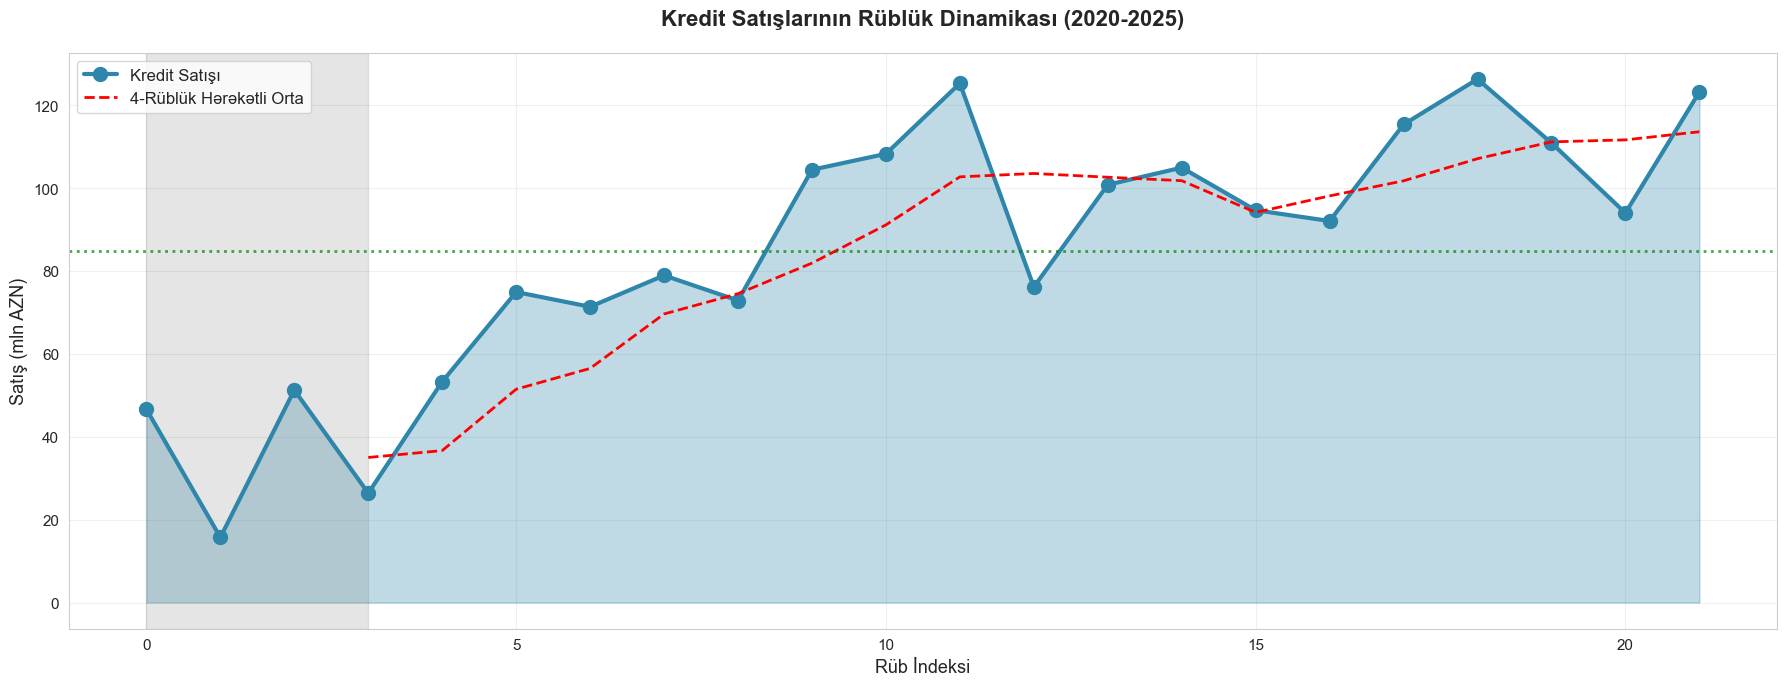


📊 ƏSAS STATİSTİKA:
Orta rüblük satış: 84.88 mln AZN
Minimum: 15.71 mln AZN (2020 K2)
Maksimum: 126.29 mln AZN (2024 K3)
Standart sapma: 31.29 mln AZN
Variasiya əmsalı: 36.9%

💬 'Bu diaqram bizim satışın uzunmüddətli istiqamətini göstərir: pandemiya şokundan
   sonra güclü bərpa var, lakin volatilite hələ tam stabil deyil. Trend müsbətdir.'


In [3]:
fig, ax = plt.subplots(figsize=(18, 7))

# Əsas xətt
ax.plot(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, 
        marker='o', linewidth=3, markersize=10, color=colors[0], label='Kredit Satışı')
ax.fill_between(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, alpha=0.3, color=colors[0])

# Trend xətti (hərəkətli orta)
df['MA4'] = df['Nağd_pul_kredit_satışı'].rolling(window=4).mean()
ax.plot(df['Time_Index'], df['MA4']/1000000, 
        linestyle='--', linewidth=2, color='red', label='4-Rüblük Hərəkətli Orta')

# Başlıq və etiketlər
ax.set_title('Kredit Satışlarının Rüblük Dinamikası (2020-2025)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rüb İndeksi', fontsize=13)
ax.set_ylabel('Satış (mln AZN)', fontsize=13)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)

# COVID dövrü vurğusu
ax.axvspan(0, 3, alpha=0.2, color='gray', label='COVID Təsiri (2020)')

# Əsas statistika
orta_satış = df['Nağd_pul_kredit_satışı'].mean()/1000000
ax.axhline(y=orta_satış, color='green', linestyle=':', linewidth=2, alpha=0.7, label=f'Orta: {orta_satış:.1f}M AZN')

plt.tight_layout()
plt.show()

print("\n📊 ƏSAS STATİSTİKA:")
print("="*70)
print(f"Orta rüblük satış: {df['Nağd_pul_kredit_satışı'].mean()/1000000:.2f} mln AZN")
print(f"Minimum: {df['Nağd_pul_kredit_satışı'].min()/1000000:.2f} mln AZN ({df.loc[df['Nağd_pul_kredit_satışı'].idxmin(), 'Dövr']})")
print(f"Maksimum: {df['Nağd_pul_kredit_satışı'].max()/1000000:.2f} mln AZN ({df.loc[df['Nağd_pul_kredit_satışı'].idxmax(), 'Dövr']})")
print(f"Standart sapma: {df['Nağd_pul_kredit_satışı'].std()/1000000:.2f} mln AZN")
print(f"Variasiya əmsalı: {(df['Nağd_pul_kredit_satışı'].std()/df['Nağd_pul_kredit_satışı'].mean())*100:.1f}%")

print("\n💬 'Bu diaqram bizim satışın uzunmüddətli istiqamətini göstərir: pandemiya şokundan")
print("   sonra güclü bərpa var, lakin volatilite hələ tam stabil deyil. Trend müsbətdir.'")

---

# Diaqram 2 — Rüblük Mövsümlük (Sezonal Boxplot)

**Vizual:** Boxplot by quarter (K1–K4)  
**Dəyişənlər:** Rüblük satışlar, kvartal kateqoriyası

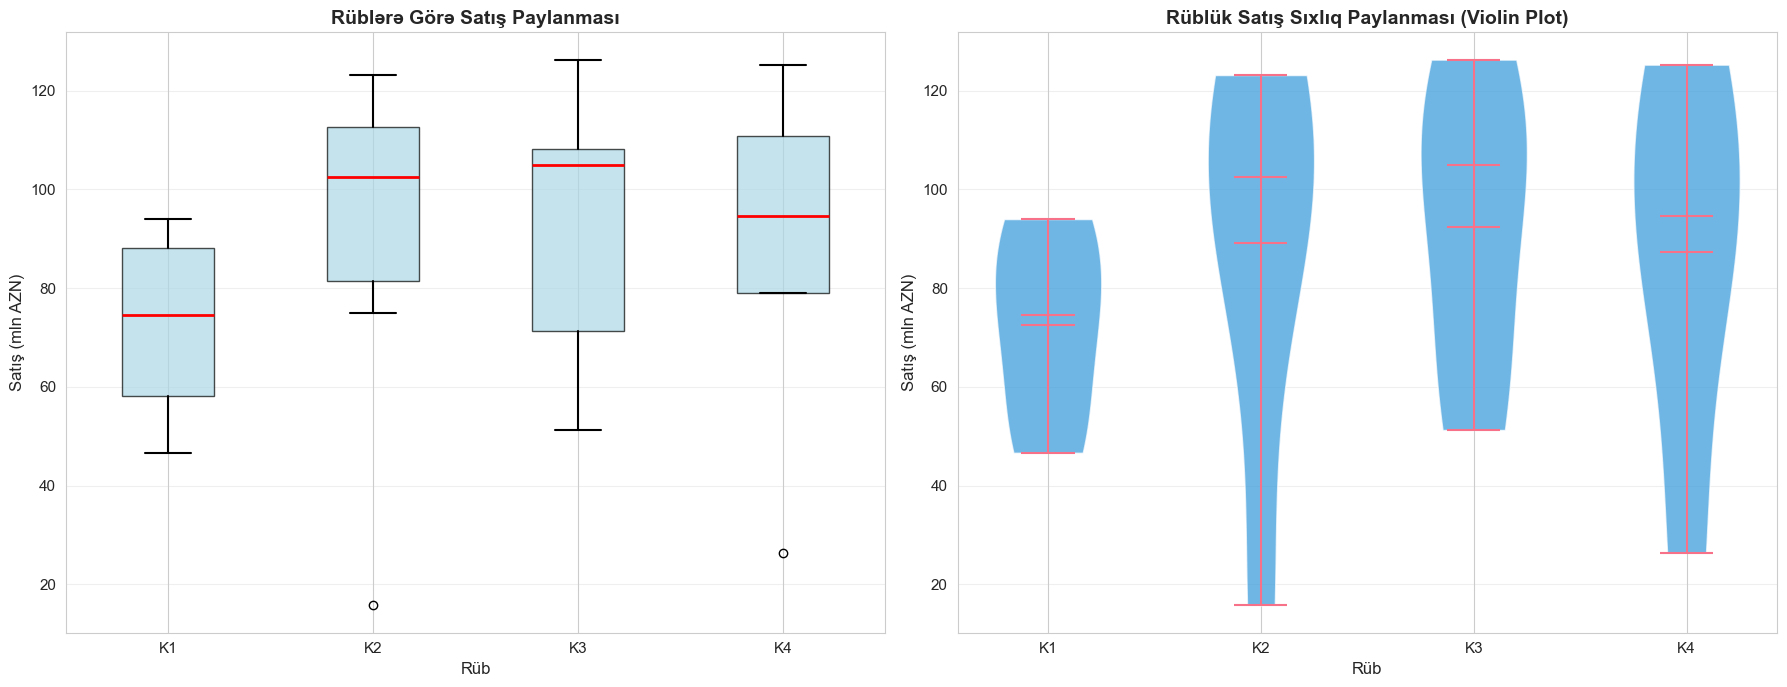


📊 RÜBLÜK STATİSTİKA:
K1: Orta=72.49M, Median=74.50M, Std=19.47M
K2: Orta=89.05M, Median=102.60M, Std=39.51M
K3: Orta=92.41M, Median=104.92M, Std=30.38M
K4: Orta=87.22M, Median=94.65M, Std=38.18M

💬 'Mövsümlük bizi hər rübdə fərqli likvidlik və resurs planlaması etməyə vadar edir
   — xüsusilə yüksək volatiliteli dövrlərdə ehtiyat tədbirləri zəruridir.'


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Boxplot
ax1 = axes[0]
bp = ax1.boxplot([df[df['Quarter']==q]['Nağd_pul_kredit_satışı'].values/1000000 for q in [1,2,3,4]],
                   labels=['K1', 'K2', 'K3', 'K4'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5))

ax1.set_title('Rüblərə Görə Satış Paylanması', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rüb', fontsize=12)
ax1.set_ylabel('Satış (mln AZN)', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Violin plot
ax2 = axes[1]
quarter_data = [df[df['Quarter']==q]['Nağd_pul_kredit_satışı'].values/1000000 for q in [1,2,3,4]]
parts = ax2.violinplot(quarter_data, positions=[1,2,3,4], showmeans=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('#3498DB')
    pc.set_alpha(0.7)

ax2.set_xticks([1,2,3,4])
ax2.set_xticklabels(['K1', 'K2', 'K3', 'K4'])
ax2.set_title('Rüblük Satış Sıxlıq Paylanması (Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Rüb', fontsize=12)
ax2.set_ylabel('Satış (mln AZN)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Rüblük statistika
print("\n📊 RÜBLÜK STATİSTİKA:")
print("="*70)
for q in [1,2,3,4]:
    q_data = df[df['Quarter']==q]['Nağd_pul_kredit_satışı']/1000000
    print(f"K{q}: Orta={q_data.mean():.2f}M, Median={q_data.median():.2f}M, Std={q_data.std():.2f}M")

print("\n💬 'Mövsümlük bizi hər rübdə fərqli likvidlik və resurs planlaması etməyə vadar edir")
print("   — xüsusilə yüksək volatiliteli dövrlərdə ehtiyat tədbirləri zəruridir.'")

---

# Diaqram 3 — Trend vs Mövsümlük (STL Dekompozisiya)

**Vizual:** Trend, Seasonal və Remainder üç paneli  
**Dəyişənlər:** Rüblük vaxt seriyası

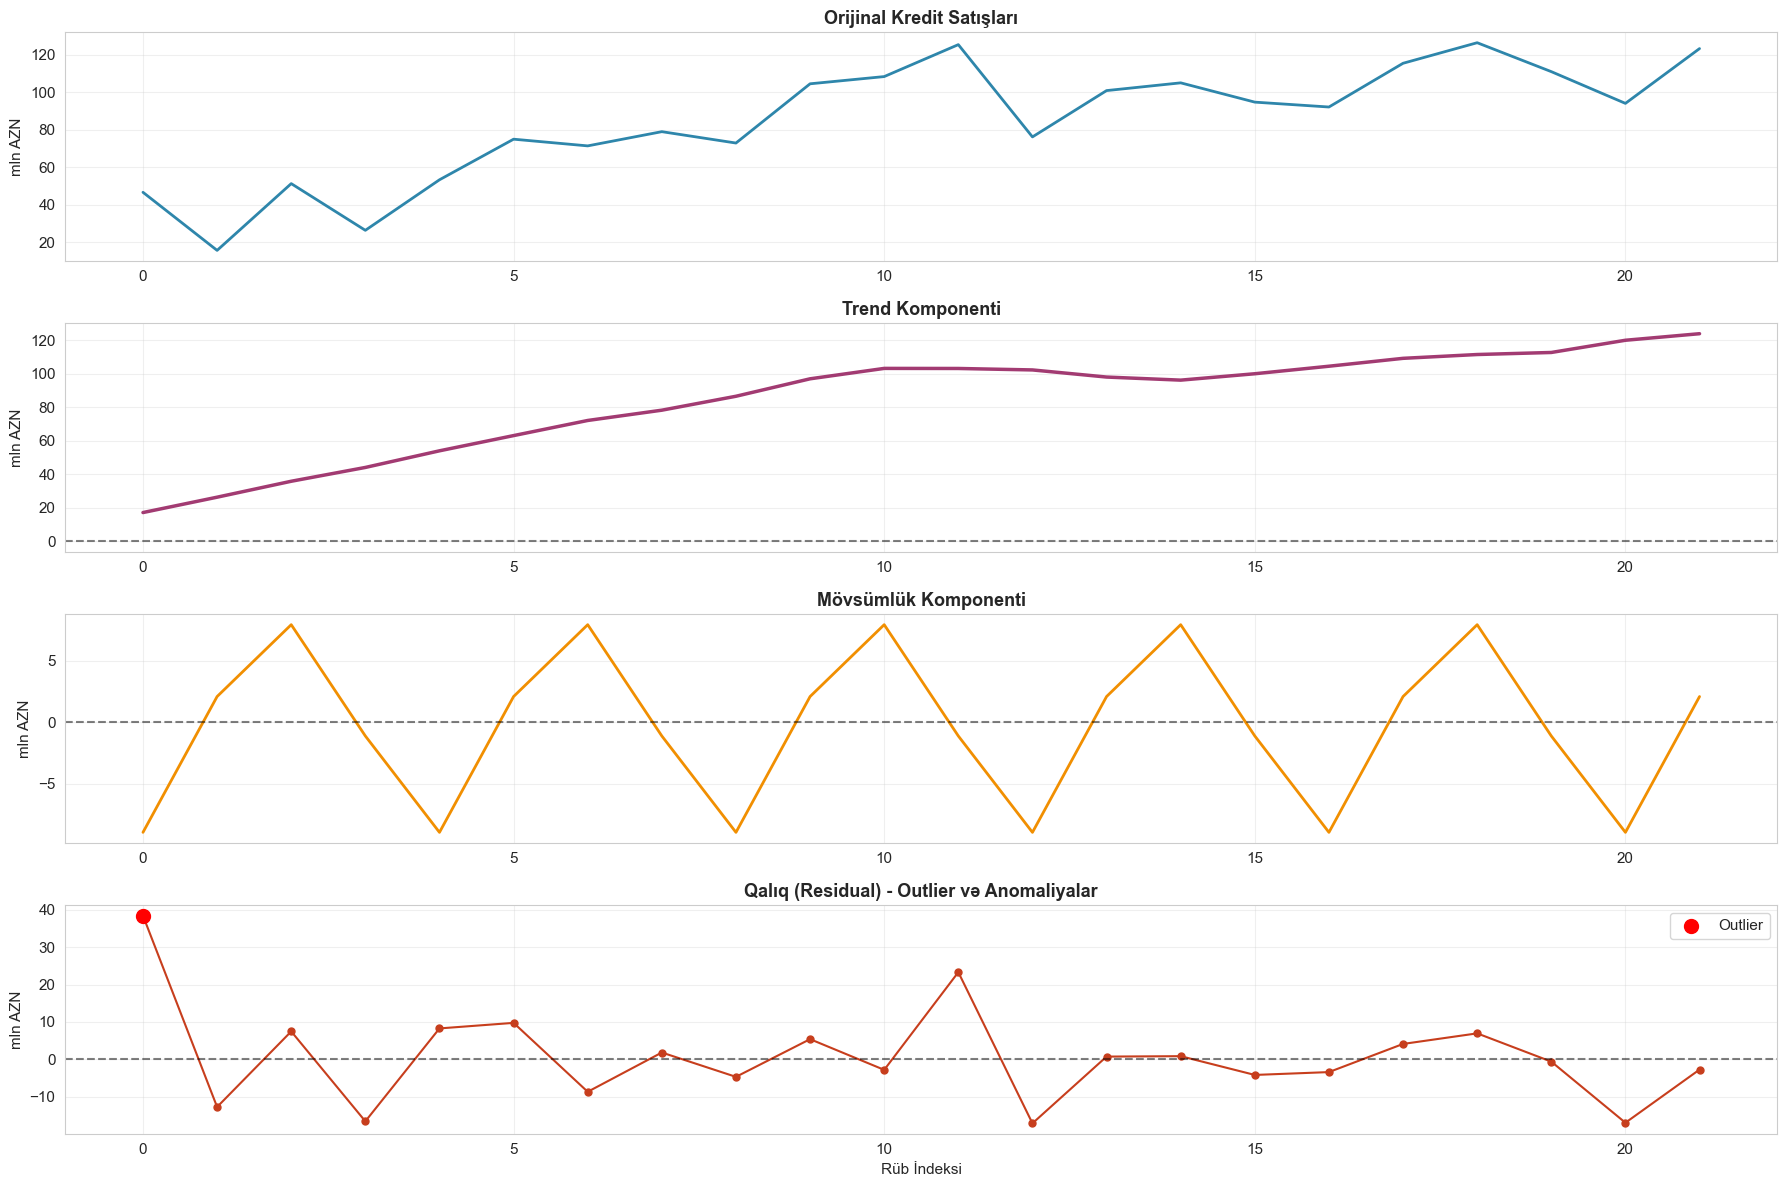


📊 DEKOMPOZ İYA TƏHLİLİ:
Trend varians: 9.78e+14
Mövsümlük varians: 3.94e+13
Qalıq varians: 1.66e+14

Outlier sayı: 1
Outlier dövrlər: ['2020 K1']

💬 'Dekompozisiya təhlili göstərir ki, bizim uzunmüddətli süjet konstruktivdir,
   amma bəzi əməliyyat hadisələri qısa müddətli sapmalara səbəb olub. Bunları araşdırmalıyıq.'


In [5]:
# STL Dekompozisiyası - Additive decomposition istifadə edərək
from statsmodels.tsa.seasonal import seasonal_decompose

ts_data = df.set_index('Time_Index')['Nağd_pul_kredit_satışı']
# Additive model istifadə edirik
result = seasonal_decompose(ts_data, model='additive', period=4, extrapolate_trend='freq')

fig, axes = plt.subplots(4, 1, figsize=(18, 12))

# Orijinal
axes[0].plot(result.observed.index, result.observed/1000000, color=colors[0], linewidth=2)
axes[0].set_title('Orijinal Kredit Satışları', fontsize=13, fontweight='bold')
axes[0].set_ylabel('mln AZN')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(result.trend.index, result.trend/1000000, color=colors[1], linewidth=2.5)
axes[1].set_title('Trend Komponenti', fontsize=13, fontweight='bold')
axes[1].set_ylabel('mln AZN')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Mövsümlük
axes[2].plot(result.seasonal.index, result.seasonal/1000000, color=colors[2], linewidth=2)
axes[2].set_title('Mövsümlük Komponenti', fontsize=13, fontweight='bold')
axes[2].set_ylabel('mln AZN')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Qalıq
axes[3].plot(result.resid.index, result.resid/1000000, color=colors[3], linewidth=1.5, marker='o', markersize=5)
axes[3].set_title('Qalıq (Residual) - Outlier və Anomaliyalar', fontsize=13, fontweight='bold')
axes[3].set_ylabel('mln AZN')
axes[3].set_xlabel('Rüb İndeksi')
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=0, color='black', linestyle='--', alpha=0.5)
# Outlier vurğusu
outlier_threshold = 2 * result.resid.std()
outliers = result.resid[abs(result.resid) > outlier_threshold]
axes[3].scatter(outliers.index, outliers.values/1000000, color='red', s=100, zorder=5, label='Outlier')
axes[3].legend()

plt.tight_layout()
plt.show()

print("\n📊 DEKOMPOZ İYA TƏHLİLİ:")
print("="*70)
print(f"Trend varians: {result.trend.var():.2e}")
print(f"Mövsümlük varians: {result.seasonal.var():.2e}")
print(f"Qalıq varians: {result.resid.var():.2e}")
print(f"\nOutlier sayı: {len(outliers)}")
if len(outliers) > 0:
    print(f"Outlier dövrlər: {[df.loc[df['Time_Index']==i, 'Dövr'].values[0] for i in outliers.index]}")

print("\n💬 'Dekompozisiya təhlili göstərir ki, bizim uzunmüddətli süjet konstruktivdir,")
print("   amma bəzi əməliyyat hadisələri qısa müddətli sapmalara səbəb olub. Bunları araşdırmalıyıq.'")

---

# Diaqram 4 — 4-Addımlı Qabaqgörü (2026 Proqnozları: ETS)

**Vizual:** Proqnoz xətti: faktiki 2020–2025 və 2026 üçün ETS proqnozları + 95% interval  
**Dəyişənlər:** faktiki y, ETS proqnoz

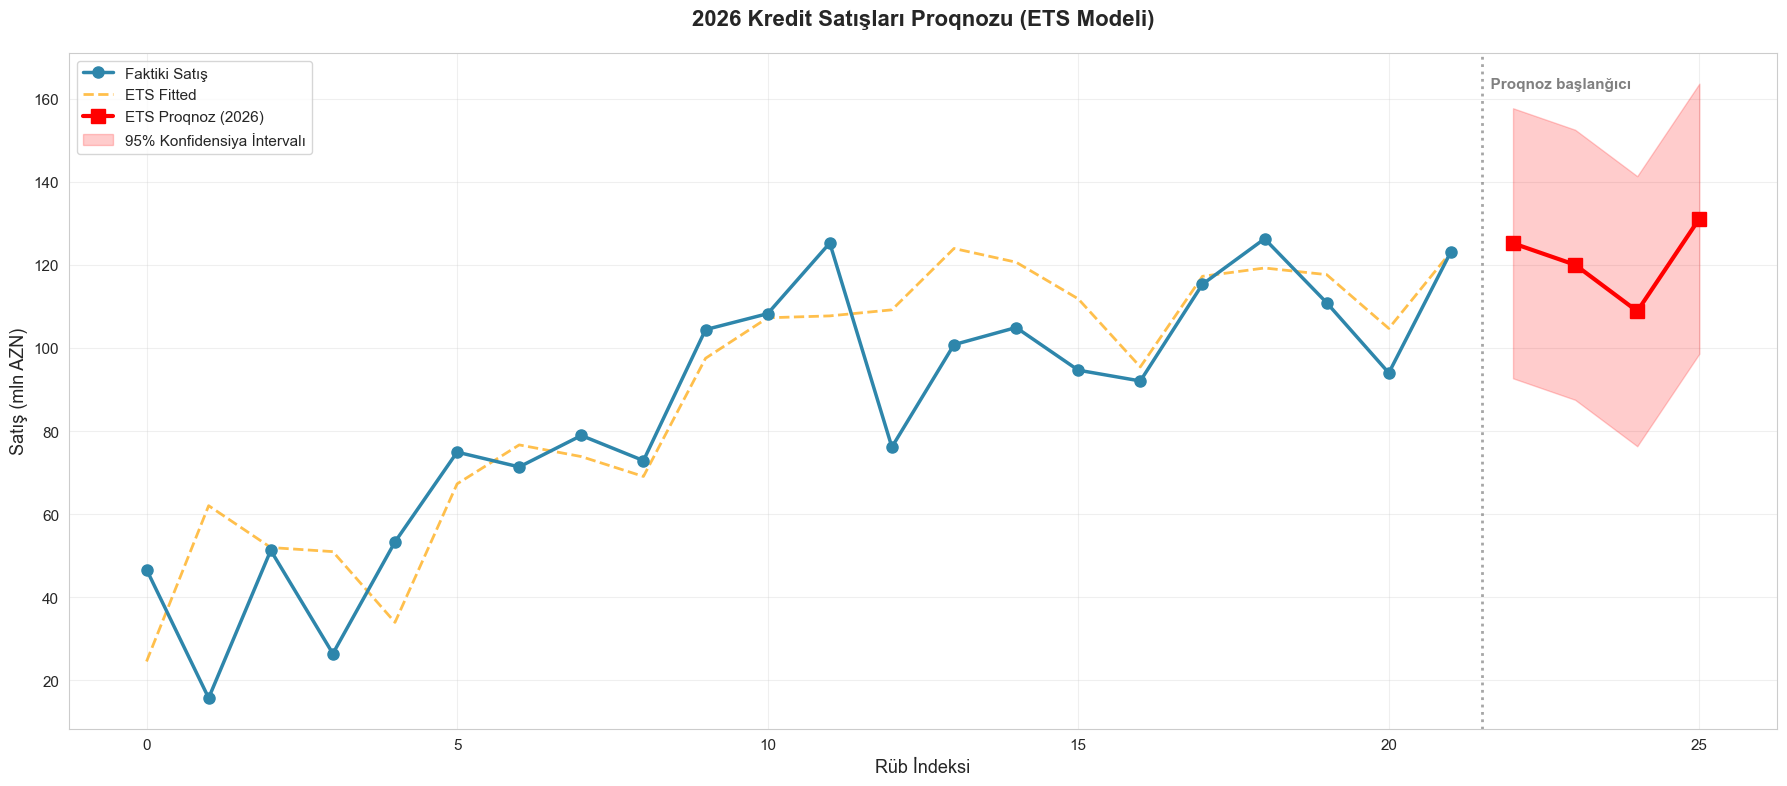


📊 2026 PROQNOZ NƏTİCƏLƏRİ (ETS):
2026 K1: 125.20 mln AZN (95% CI: 92.69 - 157.71)
2026 K2: 120.02 mln AZN (95% CI: 87.51 - 152.54)
2026 K3: 108.84 mln AZN (95% CI: 76.33 - 141.36)
2026 K4: 131.13 mln AZN (95% CI: 98.62 - 163.64)

2026 İllik proqnoz: 485.20 mln AZN
Model MAPE: 29.63%

💬 'Proqnozlarımız ETS modelinə görə 2026-da artım gözləyir,
   lakin qeyri-müəyyənlik intervalı genişdir — risk ssenariləri hazırlamalıyıq.'


In [6]:
# ETS Model (Exponential Smoothing)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ts_data = df['Nağd_pul_kredit_satışı'].values
model_ets = ExponentialSmoothing(ts_data, seasonal_periods=4, trend='add', seasonal='add')
fit_ets = model_ets.fit()

# 4 rüb qabaqgörü
forecast_ets = fit_ets.forecast(steps=4)
forecast_index = list(range(len(df), len(df)+4))

# Vizualizasiya
fig, ax = plt.subplots(figsize=(18, 8))

# Faktiki
ax.plot(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, 
        marker='o', linewidth=2.5, markersize=8, color=colors[0], label='Faktiki Satış', zorder=3)

# ETS fitted
ax.plot(df['Time_Index'], fit_ets.fittedvalues/1000000, 
        linestyle='--', linewidth=2, color='orange', label='ETS Fitted', alpha=0.7)

# Proqnoz
ax.plot(forecast_index, forecast_ets/1000000, 
        marker='s', linewidth=3, markersize=10, color='red', label='ETS Proqnoz (2026)', zorder=4)

# Konfidensiya intervalı (təxmini)
se = np.std(fit_ets.resid)
ci_lower = forecast_ets - 1.96*se
ci_upper = forecast_ets + 1.96*se
ax.fill_between(forecast_index, ci_lower/1000000, ci_upper/1000000, 
                 alpha=0.2, color='red', label='95% Konfidensiya İntervalı')

ax.axvline(x=len(df)-0.5, color='gray', linestyle=':', linewidth=2, alpha=0.7)
ax.text(len(df)-0.5, ax.get_ylim()[1]*0.95, '  Proqnoz başlanğıcı', 
        fontsize=11, color='gray', fontweight='bold')

ax.set_title('2026 Kredit Satışları Proqnozu (ETS Modeli)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rüb İndeksi', fontsize=13)
ax.set_ylabel('Satış (mln AZN)', fontsize=13)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 2026 PROQNOZ NƏTİCƏLƏRİ (ETS):")
print("="*70)
quarters_2026 = ['2026 K1', '2026 K2', '2026 K3', '2026 K4']
for i, q in enumerate(quarters_2026):
    print(f"{q}: {forecast_ets[i]/1000000:.2f} mln AZN (95% CI: {ci_lower[i]/1000000:.2f} - {ci_upper[i]/1000000:.2f})")

print(f"\n2026 İllik proqnoz: {forecast_ets.sum()/1000000:.2f} mln AZN")
# MAPE hesablama (yalnız fittedvalues uzunluğuna görə)
actual = ts_data[len(ts_data)-len(fit_ets.fittedvalues):]
mape = np.mean(np.abs((actual - fit_ets.fittedvalues) / actual)) * 100
print(f"Model MAPE: {mape:.2f}%")

print("\n💬 'Proqnozlarımız ETS modelinə görə 2026-da artım gözləyir,")
print("   lakin qeyri-müəyyənlik intervalı genişdir — risk ssenariləri hazırlamalıyıq.'")

---

# Diaqram 5 — Ssenari Müqayisəsi (Base / Optimistic / Pessimistic)

**Vizual:** Üç xəttli proqnoz + kölgəli interval  
**Dəyişənlər:** ETS əsas, +15% ssenari (optimistic), -15% (pessimistic)

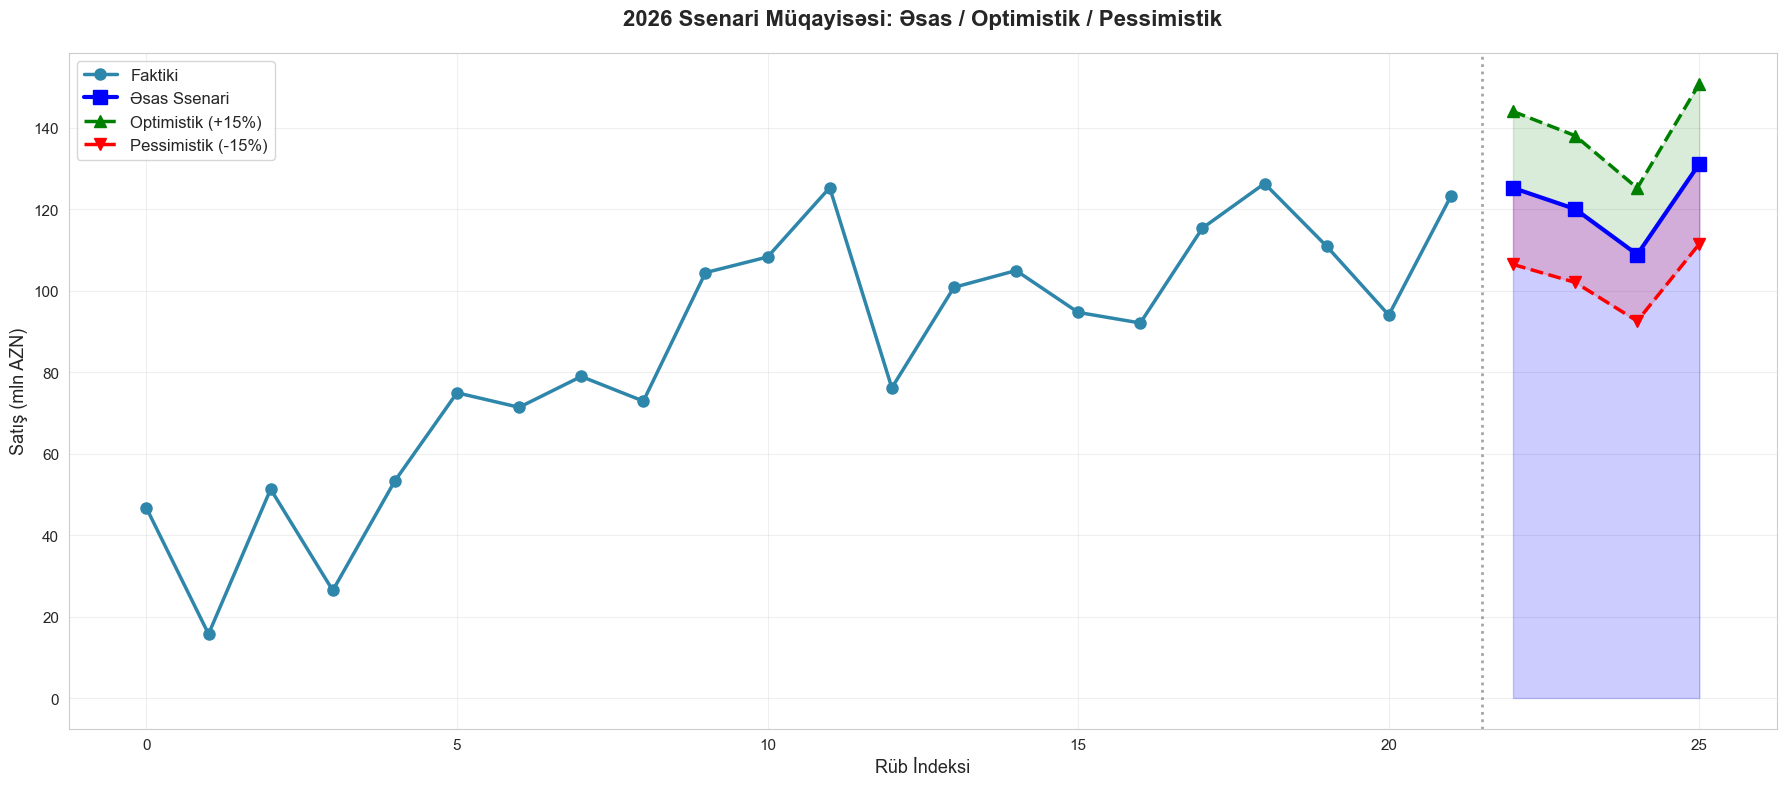


📊 SSENARI MÜQAY İSƏSİ:
2026 İllik Proqnoz:
  Əsas Ssenari:      485.20 mln AZN
  Optimistik (+15%): 557.98 mln AZN
  Pessimistik (-15%): 412.42 mln AZN

Ssenari aralığı: 145.56 mln AZN

💬 'Biz üç ssenari hazırladıq: pessimistik halda likvidlik tədbirləri,
   optimistik halda genişlənmə investisiyaları planlaşdırılıb.'


In [7]:
# Ssenari proqnozları
forecast_base = forecast_ets
forecast_optimistic = forecast_ets * 1.15
forecast_pessimistic = forecast_ets * 0.85

fig, ax = plt.subplots(figsize=(18, 8))

# Faktiki
ax.plot(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, 
        marker='o', linewidth=2.5, markersize=8, color=colors[0], label='Faktiki', zorder=3)

# Əsas ssenari
ax.plot(forecast_index, forecast_base/1000000, 
        marker='s', linewidth=3, markersize=10, color='blue', label='Əsas Ssenari', zorder=4)
ax.fill_between(forecast_index, forecast_base/1000000, alpha=0.2, color='blue')

# Optimistic
ax.plot(forecast_index, forecast_optimistic/1000000, 
        marker='^', linewidth=2.5, markersize=9, color='green', 
        linestyle='--', label='Optimistik (+15%)', zorder=4)
ax.fill_between(forecast_index, forecast_base/1000000, forecast_optimistic/1000000, 
                 alpha=0.15, color='green')

# Pessimistic
ax.plot(forecast_index, forecast_pessimistic/1000000, 
        marker='v', linewidth=2.5, markersize=9, color='red', 
        linestyle='--', label='Pessimistik (-15%)', zorder=4)
ax.fill_between(forecast_index, forecast_pessimistic/1000000, forecast_base/1000000, 
                 alpha=0.15, color='red')

ax.axvline(x=len(df)-0.5, color='gray', linestyle=':', linewidth=2, alpha=0.7)

ax.set_title('2026 Ssenari Müqayisəsi: Əsas / Optimistik / Pessimistik', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rüb İndeksi', fontsize=13)
ax.set_ylabel('Satış (mln AZN)', fontsize=13)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 SSENARI MÜQAY İSƏSİ:")
print("="*70)
print(f"2026 İllik Proqnoz:")
print(f"  Əsas Ssenari:      {forecast_base.sum()/1000000:.2f} mln AZN")
print(f"  Optimistik (+15%): {forecast_optimistic.sum()/1000000:.2f} mln AZN")
print(f"  Pessimistik (-15%): {forecast_pessimistic.sum()/1000000:.2f} mln AZN")
print(f"\nSsenari aralığı: {(forecast_optimistic.sum() - forecast_pessimistic.sum())/1000000:.2f} mln AZN")

print("\n💬 'Biz üç ssenari hazırladıq: pessimistik halda likvidlik tədbirləri,")
print("   optimistik halda genişlənmə investisiyaları planlaşdırılıb.'")

---

# Diaqram 6 — Müştəri Bazası Artımı və Seqmentasiya

**Vizual:** Dual-axis chart: müştəri sayı + müştəri başına orta kredit  
**Dəyişənlər:** Müştəri_sayı, Portfel/Müştəri

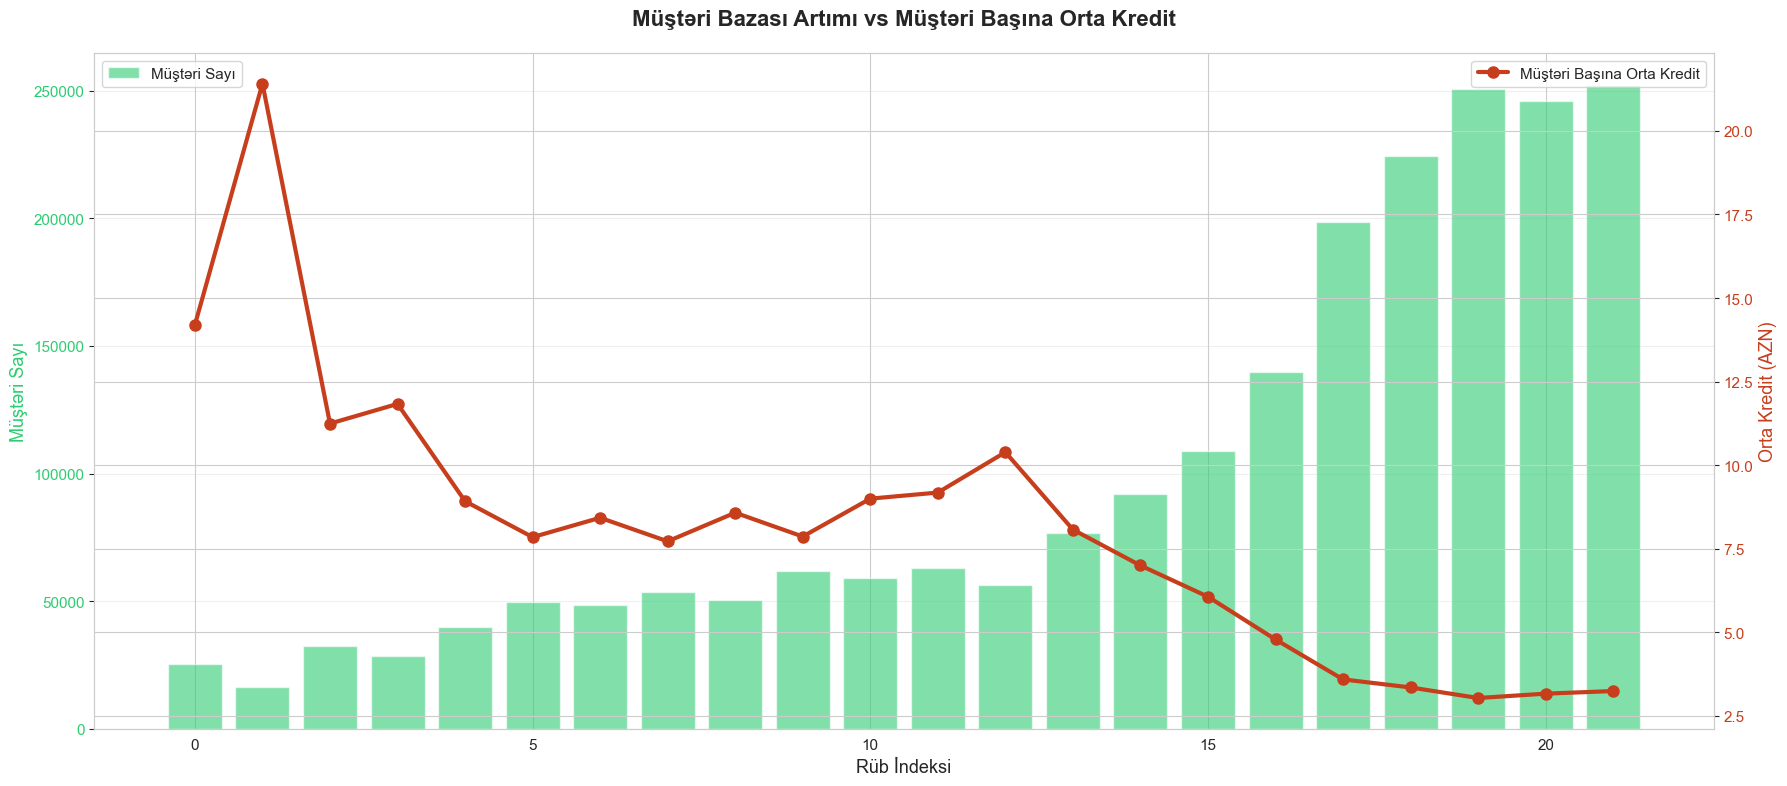


📊 MÜŞTƏRİ BAZASI TƏHLİLİ:
Müştəri artımı: 25,304 → 252,200
Artım nisbəti: 896.7%

Orta kredit: 14.20 → 3.24 AZN
Dəyişiklik: -77.2%

💬 'Müştəri bazası kütləvi artarken, orta kredit azalır — bu, kiçik məbləğli
   kütləvi kreditləşmə və risk diversifikasiyası strategiyasının uğurudur.'


In [8]:
df['Kredit_per_müştəri'] = df['Portfel'] / df['Müştəri_sayı']

fig, ax1 = plt.subplots(figsize=(18, 8))

# Müştəri sayı
ax1.bar(df['Time_Index'], df['Müştəri_sayı'], alpha=0.6, color=colors[4], label='Müştəri Sayı')
ax1.set_xlabel('Rüb İndeksi', fontsize=13)
ax1.set_ylabel('Müştəri Sayı', fontsize=13, color=colors[4])
ax1.tick_params(axis='y', labelcolor=colors[4])

# İkinci ox: müştəri başına kredit
ax2 = ax1.twinx()
ax2.plot(df['Time_Index'], df['Kredit_per_müştəri'], 
         marker='o', linewidth=3, markersize=8, color=colors[3], label='Müştəri Başına Orta Kredit')
ax2.set_ylabel('Orta Kredit (AZN)', fontsize=13, color=colors[3])
ax2.tick_params(axis='y', labelcolor=colors[3])

ax1.set_title('Müştəri Bazası Artımı vs Müştəri Başına Orta Kredit', 
              fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=11)
ax2.legend(loc='upper right', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 MÜŞTƏRİ BAZASI TƏHLİLİ:")
print("="*70)
print(f"Müştəri artımı: {df['Müştəri_sayı'].iloc[0]:,.0f} → {df['Müştəri_sayı'].iloc[-1]:,.0f}")
print(f"Artım nisbəti: {((df['Müştəri_sayı'].iloc[-1]/df['Müştəri_sayı'].iloc[0])-1)*100:.1f}%")
print(f"\nOrta kredit: {df['Kredit_per_müştəri'].iloc[0]:,.2f} → {df['Kredit_per_müştəri'].iloc[-1]:,.2f} AZN")
print(f"Dəyişiklik: {((df['Kredit_per_müştəri'].iloc[-1]/df['Kredit_per_müştəri'].iloc[0])-1)*100:.1f}%")

print("\n💬 'Müştəri bazası kütləvi artarken, orta kredit azalır — bu, kiçik məbləğli")
print("   kütləvi kreditləşmə və risk diversifikasiyası strategiyasının uğurudur.'")

---

# Diaqram 7 — NPL Dinamikası və Risk Zonaları

**Vizual:** NPL faizi ilə risk zonalarının vizualizasiyası  
**Dəyişənlər:** NPL_percentage, NPLs məbləği

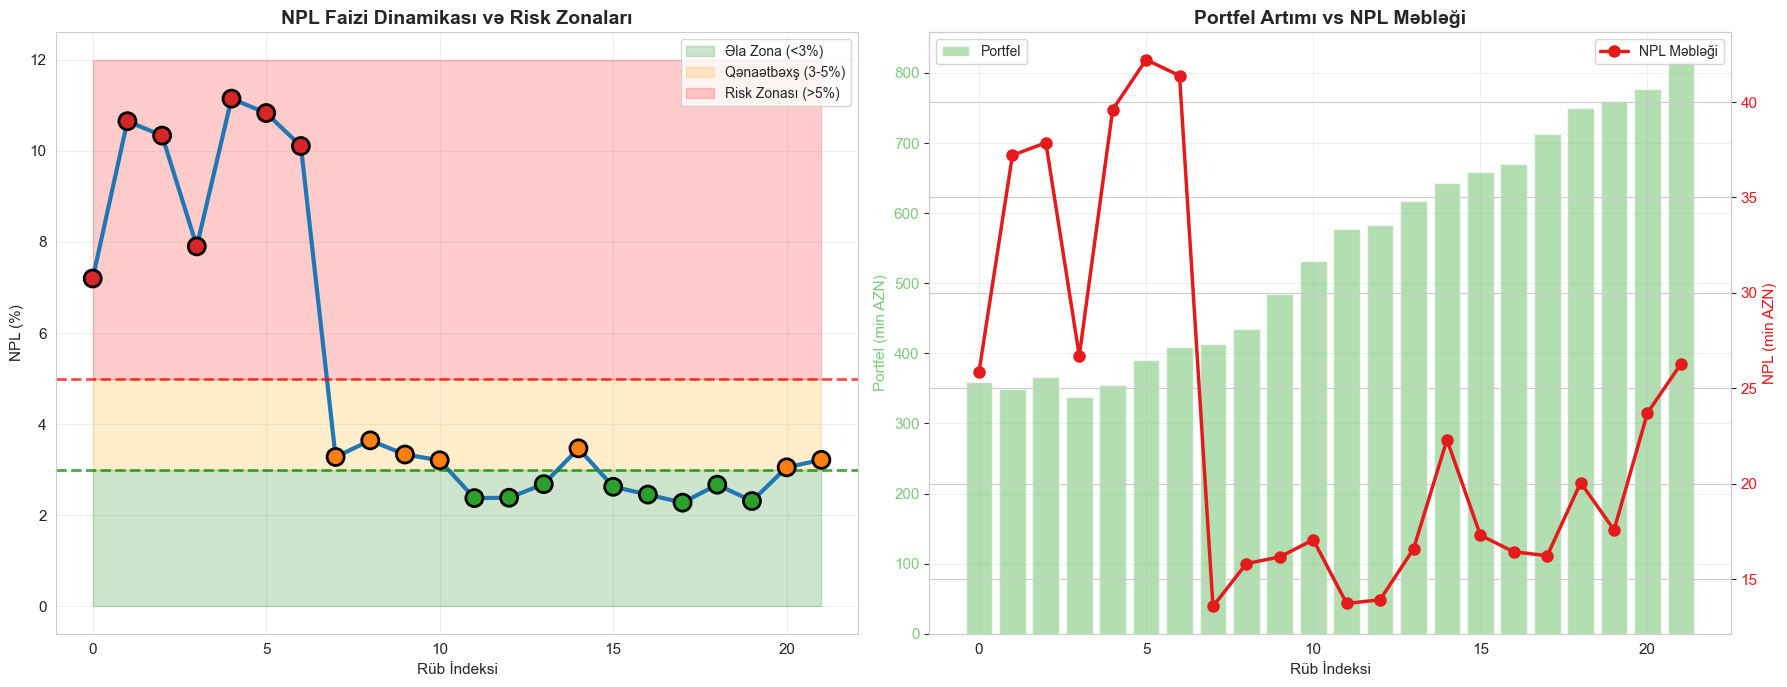


📊 NPL TƏHLİLİ:
Cari NPL: 3.22%
Ən yüksək: 11.14% (2021 K1)
Ən aşağı: 2.28% (2024 K2)
Orta NPL (son 4 rüb): 2.81%

💬 'NPL səviyyəsi sağlam zonadadır və sabit qalmaqdadır.
   Risk idarəetməsi effektiv işləyir, lakin monitorinq davam etməlidir.'


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# NPL faizi
ax1 = axes[0]
colors_npl = ['#2ca02c' if x < 3 else '#ff7f0e' if x < 5 else '#d62728' 
              for x in df['NPL_percentage']]
ax1.plot(df['Time_Index'], df['NPL_percentage'], marker='o', linewidth=3, markersize=10, color='#1f77b4')
ax1.scatter(df['Time_Index'], df['NPL_percentage'], c=colors_npl, s=150, zorder=5, 
            edgecolors='black', linewidth=2)

# Risk zonaları
ax1.fill_between(df['Time_Index'], 0, 3, alpha=0.2, color='green', label='Əla Zona (<3%)')
ax1.fill_between(df['Time_Index'], 3, 5, alpha=0.2, color='orange', label='Qənaətbəxş (3-5%)')
ax1.fill_between(df['Time_Index'], 5, 12, alpha=0.2, color='red', label='Risk Zonası (>5%)')
ax1.axhline(y=5, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.axhline(y=3, color='green', linestyle='--', linewidth=2, alpha=0.7)

ax1.set_title('NPL Faizi Dinamikası və Risk Zonaları', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rüb İndeksi')
ax1.set_ylabel('NPL (%)')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# NPL məbləği vs Portfel
ax2 = axes[1]
ax2_twin = ax2.twinx()
ax2.bar(df['Time_Index'], df['Portfel']/1000, alpha=0.6, color='#7fc97f', label='Portfel')
ax2_twin.plot(df['Time_Index'], df['NPLs']/1000, marker='o', linewidth=2.5, markersize=8,
              color='#e41a1c', label='NPL Məbləği')

ax2.set_title('Portfel Artımı vs NPL Məbləği', fontsize=14, fontweight='bold')
ax2.set_xlabel('Rüb İndeksi')
ax2.set_ylabel('Portfel (min AZN)', color='#7fc97f')
ax2_twin.set_ylabel('NPL (min AZN)', color='#e41a1c')
ax2.tick_params(axis='y', labelcolor='#7fc97f')
ax2_twin.tick_params(axis='y', labelcolor='#e41a1c')
ax2.legend(loc='upper left', fontsize=10)
ax2_twin.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 NPL TƏHLİLİ:")
print("="*70)
print(f"Cari NPL: {df['NPL_percentage'].iloc[-1]:.2f}%")
print(f"Ən yüksək: {df['NPL_percentage'].max():.2f}% ({df.loc[df['NPL_percentage'].idxmax(), 'Dövr']})")
print(f"Ən aşağı: {df['NPL_percentage'].min():.2f}% ({df.loc[df['NPL_percentage'].idxmin(), 'Dövr']})")
print(f"Orta NPL (son 4 rüb): {df['NPL_percentage'].iloc[-4:].mean():.2f}%")

print("\n💬 'NPL səviyyəsi sağlam zonadadır və sabit qalmaqdadır.")
print("   Risk idarəetməsi effektiv işləyir, lakin monitorinq davam etməlidir.'")

---

# Diaqram 8 — Makroiqtisadi Göstəricilərlə Korrelyasiya

**Vizual:** Korrelyasiya heatmap  
**Dəyişənlər:** Kredit satışları, GDP, gəlirlər, əmanətlər, NPL

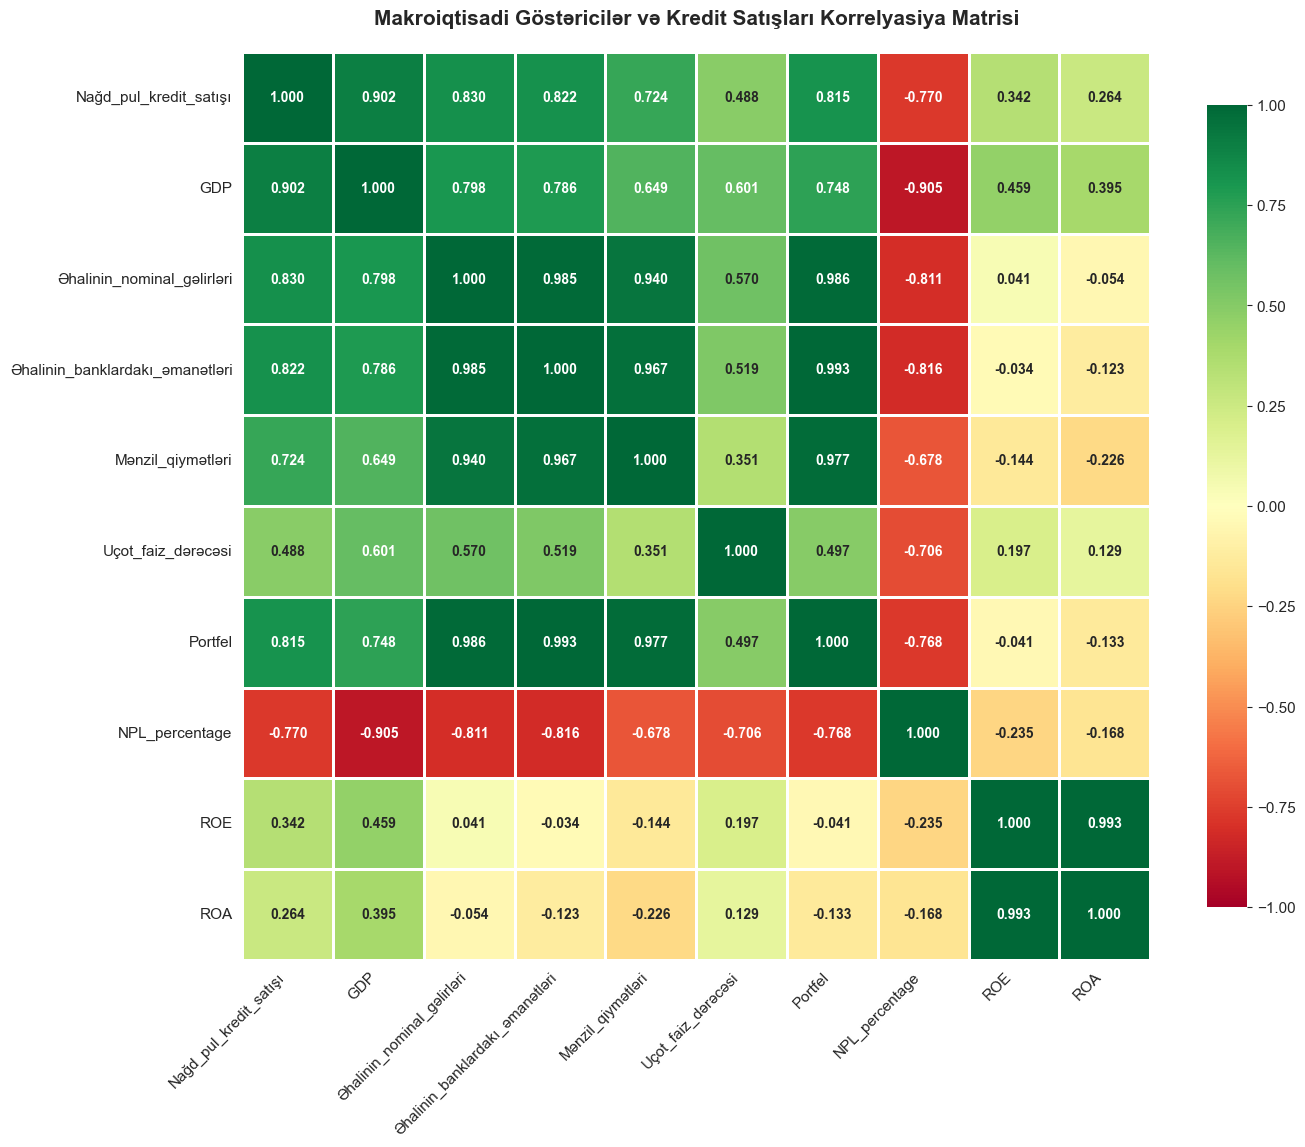


📊 KREDIT SATIŞLARI İLƏ ƏN GÜCLÜ KORRELYASİYALAR:
1. GDP: 0.902 (çox güclü müsbət)
2. Əhalinin_nominal_gəlirləri: 0.830 (çox güclü müsbət)
3. Əhalinin_banklardakı_əmanətləri: 0.822 (çox güclü müsbət)
4. Portfel: 0.815 (çox güclü müsbət)
5. Mənzil_qiymətləri: 0.724 (güclü müsbət)
6. Uçot_faiz_dərəcəsi: 0.488 (orta müsbət)
7. ROE: 0.342 (orta müsbət)
8. ROA: 0.264 (orta müsbət)
9. NPL_percentage: -0.770 (güclü mənfi)

💬 'Korrelyasiya təhlili göstərir ki, kredit satışlarımız makroiqtisadi
   göstəricilərlə güclü əlaqədədir — GDP və əhalinin gəlirləri əsas driver-lərdir.'


In [10]:
# Korrelyasiya matrisi
corr_features = [
    'Nağd_pul_kredit_satışı',
    'GDP',
    'Əhalinin_nominal_gəlirləri',
    'Əhalinin_banklardakı_əmanətləri',
    'Mənzil_qiymətləri',
    'Uçot_faiz_dərəcəsi',
    'Portfel',
    'NPL_percentage',
    'ROE',
    'ROA'
]

corr_matrix = df[corr_features].corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1, annot_kws={'fontsize': 10, 'fontweight': 'bold'})

ax.set_title('Makroiqtisadi Göstəricilər və Kredit Satışları Korrelyasiya Matrisi',
             fontsize=15, fontweight='bold', pad=20)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

# Ən güclü korrelyasiyalar
print("\n📊 KREDIT SATIŞLARI İLƏ ƏN GÜCLÜ KORRELYASİYALAR:")
print("="*70)
sales_corr = corr_matrix['Nağd_pul_kredit_satışı'].drop('Nağd_pul_kredit_satışı').sort_values(ascending=False)
for i, (feature, corr) in enumerate(sales_corr.items(), 1):
    direction = "müsbət" if corr > 0 else "mənfi"
    strength = "çox güclü" if abs(corr) > 0.8 else "güclü" if abs(corr) > 0.6 else "orta"
    print(f"{i}. {feature}: {corr:.3f} ({strength} {direction})")

print("\n💬 'Korrelyasiya təhlili göstərir ki, kredit satışlarımız makroiqtisadi")
print("   göstəricilərlə güclü əlaqədədir — GDP və əhalinin gəlirləri əsas driver-lərdir.'")

---

# Diaqram 9 — Maliyyə Performans Göstəriciləri

**Vizual:** ROE, ROA, NIM dinamikası  
**Dəyişənlər:** ROE, ROA, Net_Interest_Margin

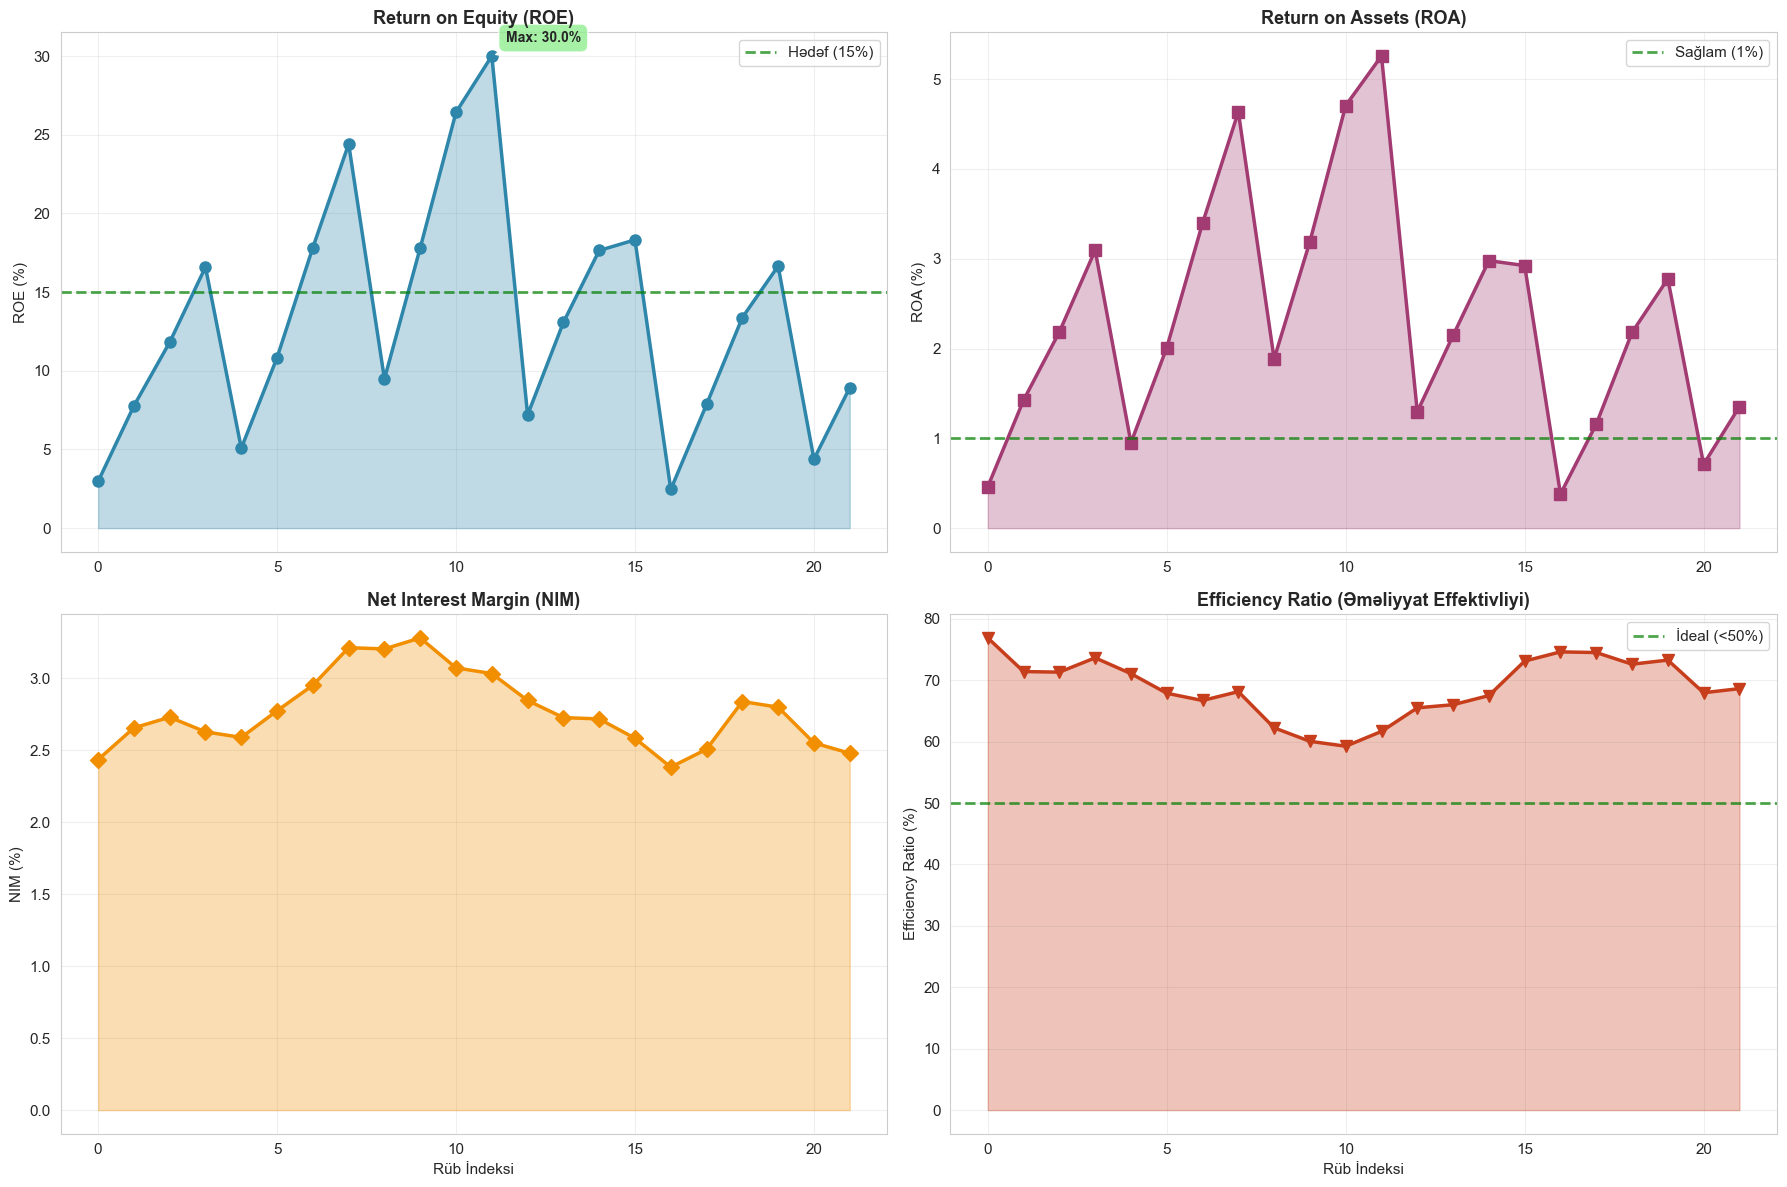


📊 MALİYYƏ PERFORMANS GÖSTƏRİCİLƏRİ:
Cari ROE: 8.92% (Orta: 13.22%)
Cari ROA: 1.35% (Orta: 2.32%)
Cari NIM: 2.48%
Cari Efficiency Ratio: 68.6%

💬 'ROE və ROA göstəriciləri sağlam səviyyədədir, lakin Efficiency Ratio
   yüksəkdir — əməliyyat xərclərinin optimallaşdırılması prioritetdir.'


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ROE
ax1 = axes[0, 0]
ax1.plot(df['Time_Index'], df['ROE']*100, marker='o', linewidth=2.5, markersize=8, color=colors[0])
ax1.fill_between(df['Time_Index'], df['ROE']*100, alpha=0.3, color=colors[0])
ax1.axhline(y=15, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Hədəf (15%)')
max_roe_idx = df['ROE'].idxmax()
ax1.annotate(f"Max: {df.loc[max_roe_idx, 'ROE']*100:.1f}%",
             xy=(df.loc[max_roe_idx, 'Time_Index'], df.loc[max_roe_idx, 'ROE']*100),
             xytext=(10, 10), textcoords='offset points', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ax1.set_title('Return on Equity (ROE)', fontsize=13, fontweight='bold')
ax1.set_ylabel('ROE (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# ROA
ax2 = axes[0, 1]
ax2.plot(df['Time_Index'], df['ROA']*100, marker='s', linewidth=2.5, markersize=8, color=colors[1])
ax2.fill_between(df['Time_Index'], df['ROA']*100, alpha=0.3, color=colors[1])
ax2.axhline(y=1, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Sağlam (1%)')
ax2.set_title('Return on Assets (ROA)', fontsize=13, fontweight='bold')
ax2.set_ylabel('ROA (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# NIM
ax3 = axes[1, 0]
ax3.plot(df['Time_Index'], df['Net_Interest_Margin']*100, marker='D', linewidth=2.5, 
         markersize=8, color=colors[2])
ax3.fill_between(df['Time_Index'], df['Net_Interest_Margin']*100, alpha=0.3, color=colors[2])
ax3.set_title('Net Interest Margin (NIM)', fontsize=13, fontweight='bold')
ax3.set_xlabel('Rüb İndeksi')
ax3.set_ylabel('NIM (%)')
ax3.grid(True, alpha=0.3)

# Efficiency Ratio
ax4 = axes[1, 1]
ax4.plot(df['Time_Index'], df['Efficiency_Ratio']*100, marker='v', linewidth=2.5, 
         markersize=8, color=colors[3])
ax4.fill_between(df['Time_Index'], df['Efficiency_Ratio']*100, alpha=0.3, color=colors[3])
ax4.axhline(y=50, color='green', linestyle='--', linewidth=2, alpha=0.7, label='İdeal (<50%)')
ax4.set_title('Efficiency Ratio (Əməliyyat Effektivliyi)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Rüb İndeksi')
ax4.set_ylabel('Efficiency Ratio (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 MALİYYƏ PERFORMANS GÖSTƏRİCİLƏRİ:")
print("="*70)
print(f"Cari ROE: {df['ROE'].iloc[-1]*100:.2f}% (Orta: {df['ROE'].mean()*100:.2f}%)")
print(f"Cari ROA: {df['ROA'].iloc[-1]*100:.2f}% (Orta: {df['ROA'].mean()*100:.2f}%)")
print(f"Cari NIM: {df['Net_Interest_Margin'].iloc[-1]*100:.2f}%")
print(f"Cari Efficiency Ratio: {df['Efficiency_Ratio'].iloc[-1]*100:.1f}%")

print("\n💬 'ROE və ROA göstəriciləri sağlam səviyyədədir, lakin Efficiency Ratio")
print("   yüksəkdir — əməliyyat xərclərinin optimallaşdırılması prioritetdir.'")

---

# Diaqram 10 — Volatilite və Risk Təhlili

**Vizual:** Rolling volatility (4-rüblük hərəkətli standart sapma)  
**Dəyişənlər:** Satışların volatilitesi

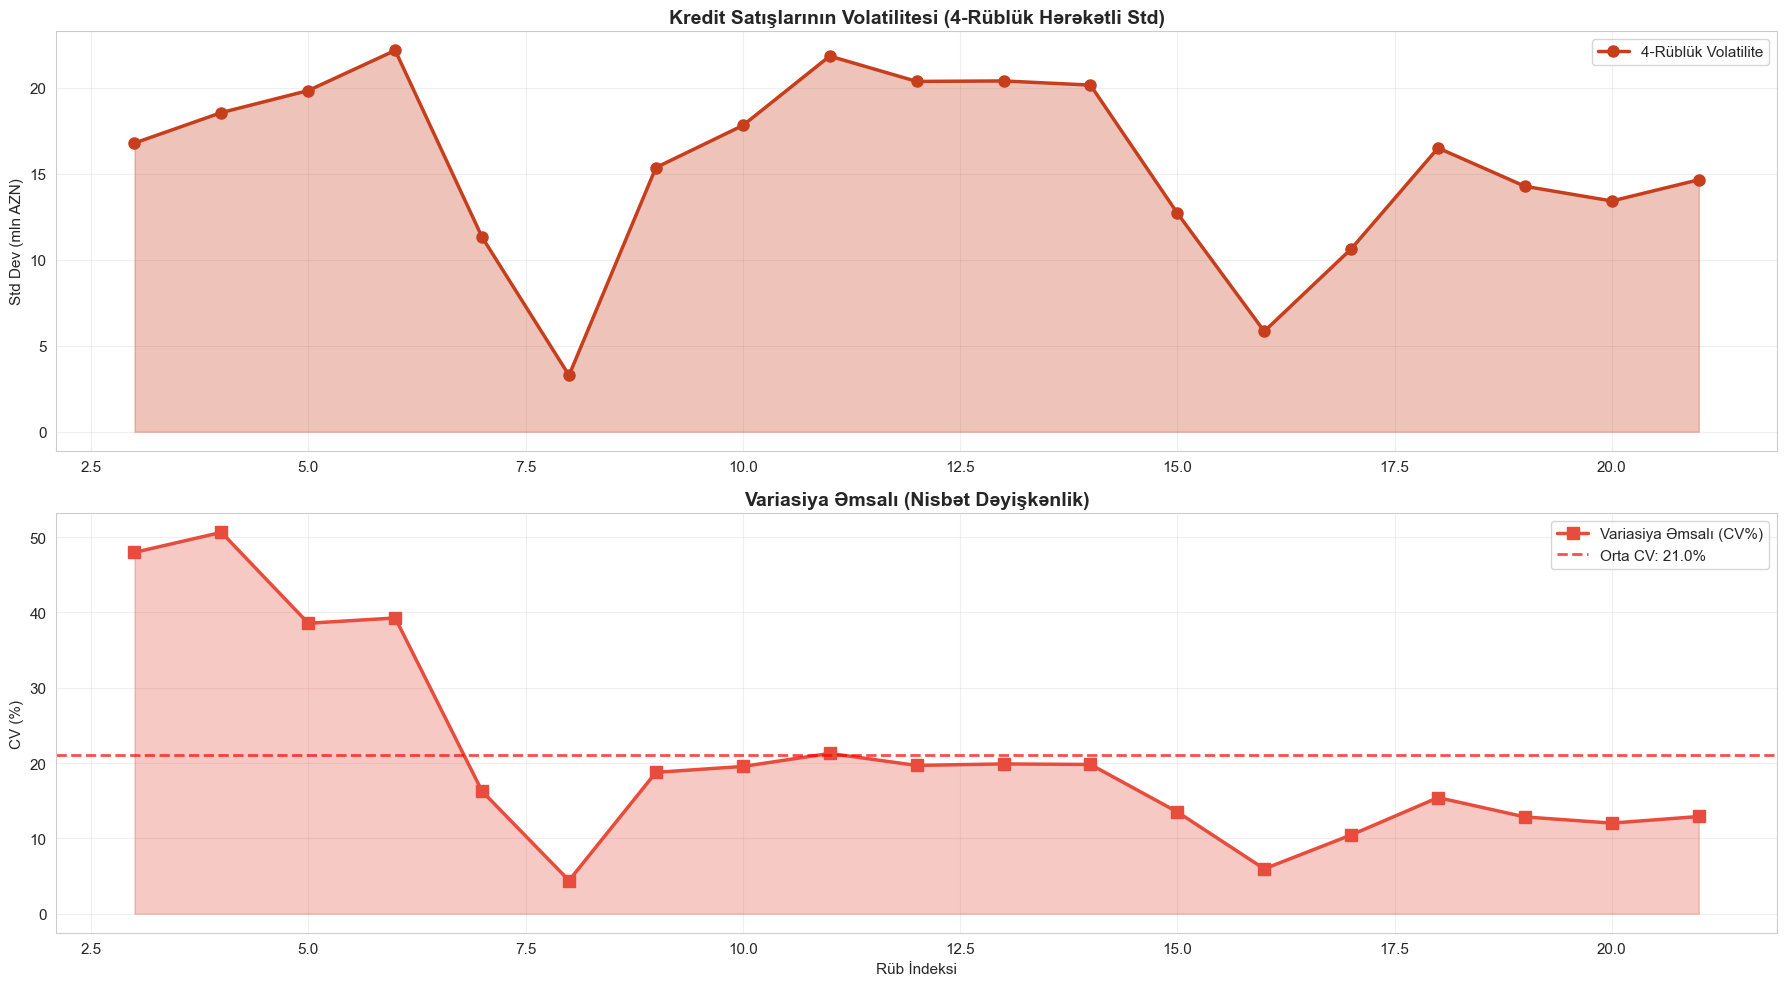


📊 VOLATİLİTE TƏHLİLİ:
Orta volatilite: 15.58 mln AZN
Ən yüksək volatilite: 22.18 mln AZN
Orta CV: 21.0%
Son 4 rübün CV-si: 13.3%

💬 'Volatilite təhlili göstərir ki, satışlar sabitləşir, lakin hələ də
   dəyişkənlik var — likvidlik bufferləri buna uyğun saxlanmalıdır.'


In [12]:
# Rolling volatility
df['Rolling_Vol'] = df['Nağd_pul_kredit_satışı'].rolling(window=4).std()
df['Rolling_Mean'] = df['Nağd_pul_kredit_satışı'].rolling(window=4).mean()
df['CV'] = (df['Rolling_Vol'] / df['Rolling_Mean']) * 100  # Coefficient of Variation

fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Volatilite
ax1 = axes[0]
ax1.plot(df['Time_Index'], df['Rolling_Vol']/1000000, marker='o', linewidth=2.5, 
         markersize=8, color=colors[3], label='4-Rüblük Volatilite')
ax1.fill_between(df['Time_Index'], df['Rolling_Vol']/1000000, alpha=0.3, color=colors[3])
ax1.set_title('Kredit Satışlarının Volatilitesi (4-Rüblük Hərəkətli Std)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Std Dev (mln AZN)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Coefficient of Variation
ax2 = axes[1]
ax2.plot(df['Time_Index'], df['CV'], marker='s', linewidth=2.5, markersize=8, 
         color=colors[5], label='Variasiya Əmsalı (CV%)')
ax2.fill_between(df['Time_Index'], df['CV'], alpha=0.3, color=colors[5])
ax2.axhline(y=df['CV'].mean(), color='red', linestyle='--', linewidth=2, 
            alpha=0.7, label=f'Orta CV: {df["CV"].mean():.1f}%')
ax2.set_title('Variasiya Əmsalı (Nisbət Dəyişkənlik)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Rüb İndeksi')
ax2.set_ylabel('CV (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 VOLATİLİTE TƏHLİLİ:")
print("="*70)
print(f"Orta volatilite: {df['Rolling_Vol'].mean()/1000000:.2f} mln AZN")
print(f"Ən yüksək volatilite: {df['Rolling_Vol'].max()/1000000:.2f} mln AZN")
print(f"Orta CV: {df['CV'].mean():.1f}%")
print(f"Son 4 rübün CV-si: {df['CV'].iloc[-4:].mean():.1f}%")

print("\n💬 'Volatilite təhlili göstərir ki, satışlar sabitləşir, lakin hələ də")
print("   dəyişkənlik var — likvidlik bufferləri buna uyğun saxlanmalıdır.'")

---

# Diaqram 11–25: Əlavə Təhlillər

**Qeyd:** Növbəti diaqramlar üçün əlavə məlumat lazımdır (məsələn: məhsul kateqoriyaları, kanallar, regional məlumat, churn data). 

Mövcud məlumatlarla aşağıdakı əlavə təhlillər aparıla bilər:

## Diaqram 11 — Fəsillik Təhlili (Seasonal Patterns)

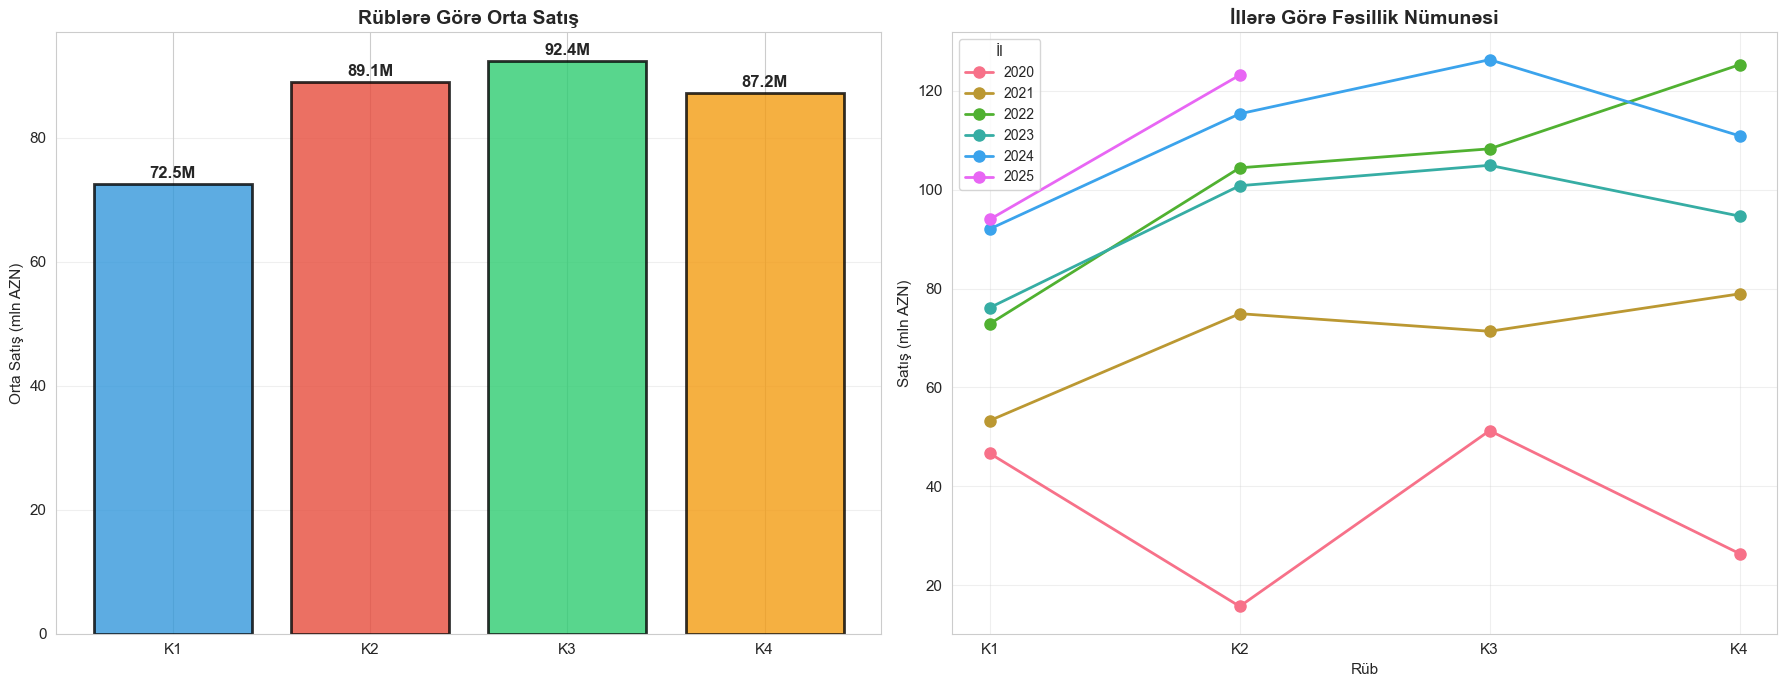


📊 FƏSİLLİK STATİSTİKASI:
        Nağd_pul_kredit_satışı                                          \
                          mean          std          min           max   
Quarter                                                                  
1                  72494866.21  19465435.63  46642841.49  9.398308e+07   
2                  89054683.22  39514650.60  15709384.47  1.231601e+08   
3                  92413394.35  30380991.91  51257547.77  1.262854e+08   
4                  87220774.78  38181291.71  26391997.72  1.252620e+08   

        NPL_percentage Müştəri_sayı  
                  mean         mean  
Quarter                              
1                 4.98     92948.17  
2                 5.50    109178.50  
3                 5.96     91306.20  
4                 3.70    100937.40  

💬 'Aydın fəsillik nümunəsi var — K2 və K3 ən aktiv dövrləridir.
   Resurs planlaması bu nümunələrə əsaslanmalıdır.'


In [13]:
# Fəsillik analizi
quarterly_stats = df.groupby('Quarter').agg({
    'Nağd_pul_kredit_satışı': ['mean', 'std', 'min', 'max'],
    'NPL_percentage': 'mean',
    'Müştəri_sayı': 'mean'
}).round(2)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Rüblərə görə orta satış
ax1 = axes[0]
q_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
means = [df[df['Quarter']==q]['Nağd_pul_kredit_satışı'].mean()/1000000 for q in [1,2,3,4]]
bars = ax1.bar([1,2,3,4], means, color=q_colors, alpha=0.8, edgecolor='black', linewidth=2)
for i, (bar, val) in enumerate(zip(bars, means)):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}M',
             ha='center', fontsize=12, fontweight='bold')
ax1.set_title('Rüblərə Görə Orta Satış', fontsize=14, fontweight='bold')
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['K1', 'K2', 'K3', 'K4'])
ax1.set_ylabel('Orta Satış (mln AZN)')
ax1.grid(True, alpha=0.3, axis='y')

# İllərə görə rüblük nümunə
ax2 = axes[1]
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    ax2.plot(year_data['Quarter'], year_data['Nağd_pul_kredit_satışı']/1000000,
             marker='o', linewidth=2, markersize=8, label=f'{int(year)}')
ax2.set_title('İllərə Görə Fəsillik Nümunəsi', fontsize=14, fontweight='bold')
ax2.set_xticks([1,2,3,4])
ax2.set_xticklabels(['K1', 'K2', 'K3', 'K4'])
ax2.set_xlabel('Rüb')
ax2.set_ylabel('Satış (mln AZN)')
ax2.legend(title='İl', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 FƏSİLLİK STATİSTİKASI:")
print(quarterly_stats)

print("\n💬 'Aydın fəsillik nümunəsi var — K2 və K3 ən aktiv dövrləridir.")
print("   Resurs planlaması bu nümunələrə əsaslanmalıdır.'")

## Diaqram 12 — Makro Göstəricilər və Satış Əlaqəsi

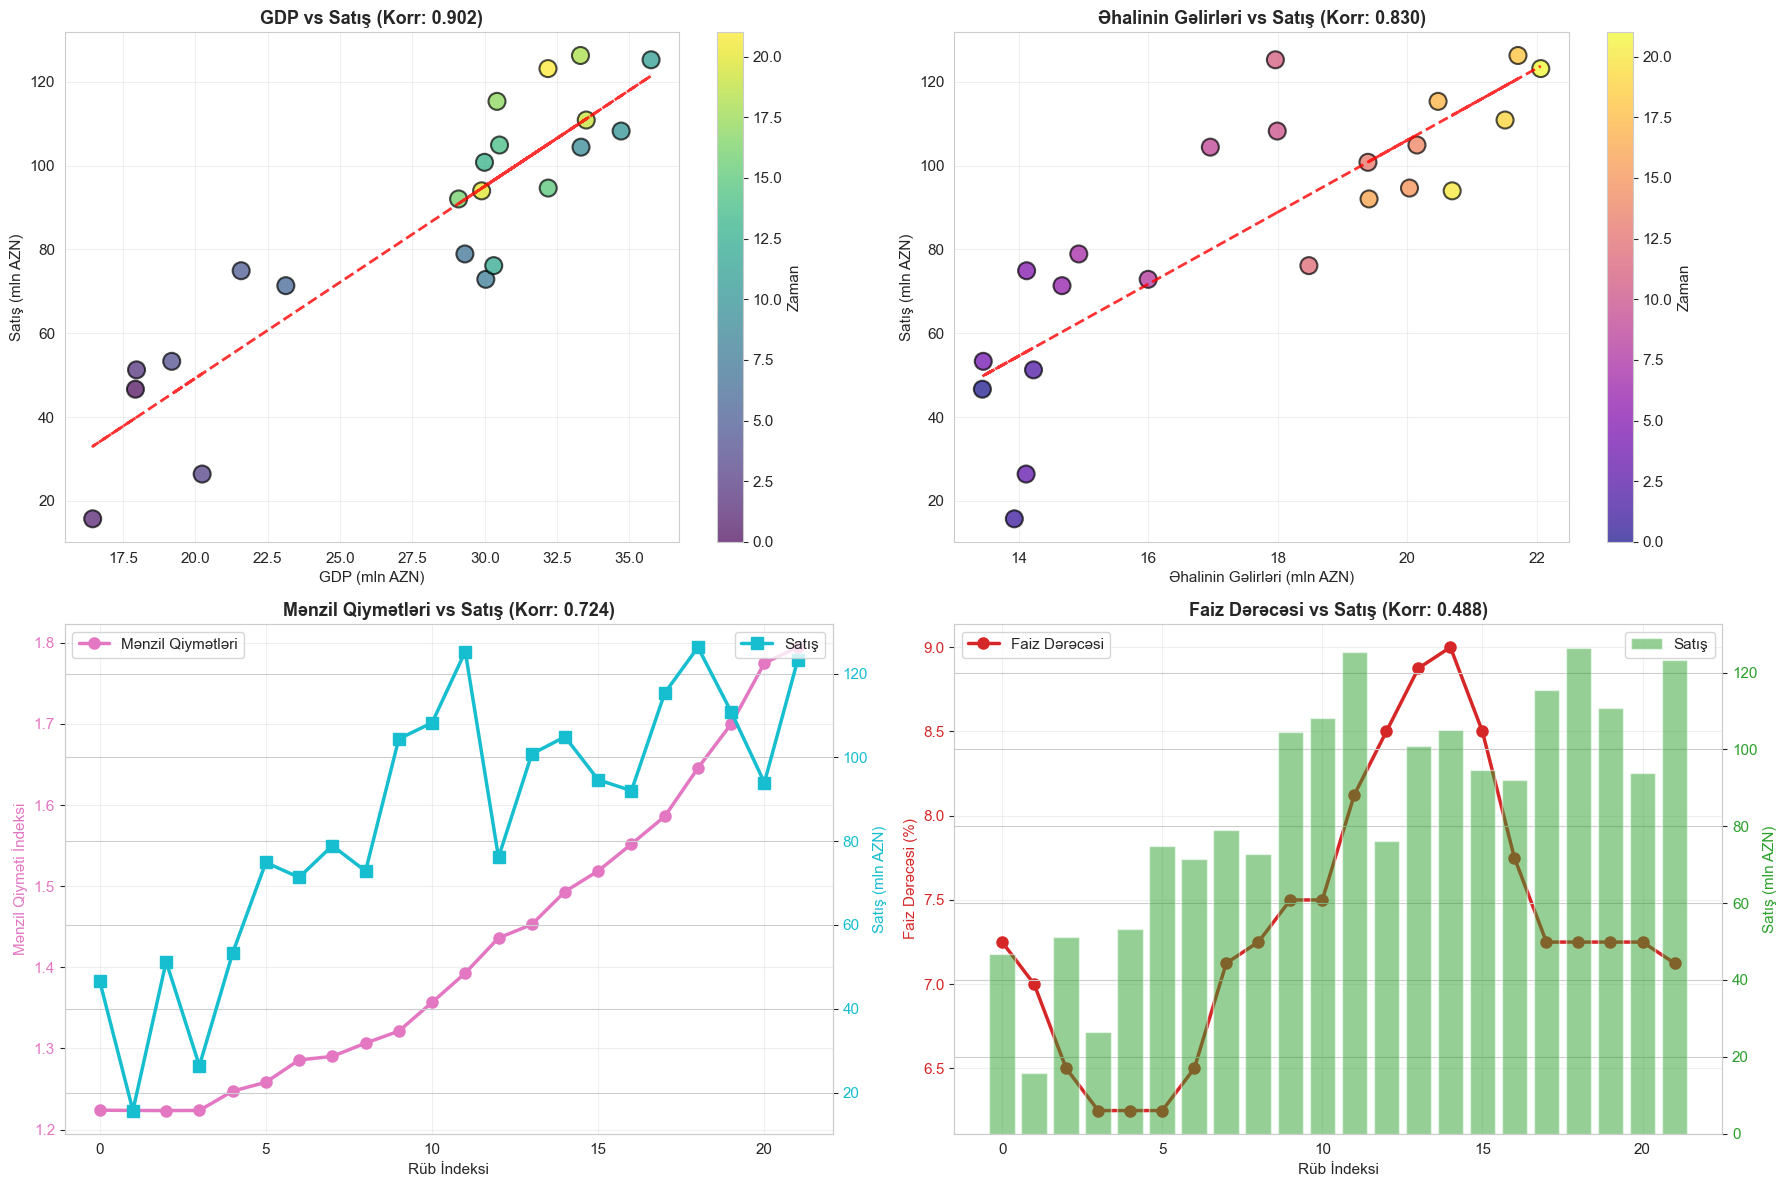


💬 'Makroiqtisadi göstəricilərlə güclü əlaqə var — GDP, gəlirlər və mənzil
   qiymətləri satışın əsas driver-ləridir. Proqnozlar bu əsasda qurulmalıdır.'


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GDP vs Satış
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['GDP']/1000000, df['Nağd_pul_kredit_satışı']/1000000,
                       c=df['Time_Index'], s=150, cmap='viridis', alpha=0.7,
                       edgecolors='black', linewidth=1.5)
z1 = np.polyfit(df['GDP'], df['Nağd_pul_kredit_satışı'], 1)
p1 = np.poly1d(z1)
ax1.plot(df['GDP']/1000000, p1(df['GDP'])/1000000, "r--", linewidth=2, alpha=0.8)
ax1.set_title(f'GDP vs Satış (Korr: {df["GDP"].corr(df["Nağd_pul_kredit_satışı"]):.3f})',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('GDP (mln AZN)')
ax1.set_ylabel('Satış (mln AZN)')
plt.colorbar(scatter1, ax=ax1, label='Zaman')
ax1.grid(True, alpha=0.3)

# Əhalinin gəlirləri vs Satış
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df['Əhalinin_nominal_gəlirləri']/1000000, df['Nağd_pul_kredit_satışı']/1000000,
                       c=df['Time_Index'], s=150, cmap='plasma', alpha=0.7,
                       edgecolors='black', linewidth=1.5)
z2 = np.polyfit(df['Əhalinin_nominal_gəlirləri'], df['Nağd_pul_kredit_satışı'], 1)
p2 = np.poly1d(z2)
ax2.plot(df['Əhalinin_nominal_gəlirləri']/1000000, p2(df['Əhalinin_nominal_gəlirləri'])/1000000, 
         "r--", linewidth=2, alpha=0.8)
ax2.set_title(f'Əhalinin Gəlirləri vs Satış (Korr: {df["Əhalinin_nominal_gəlirləri"].corr(df["Nağd_pul_kredit_satışı"]):.3f})',
              fontsize=13, fontweight='bold')
ax2.set_xlabel('Əhalinin Gəlirləri (mln AZN)')
ax2.set_ylabel('Satış (mln AZN)')
plt.colorbar(scatter2, ax=ax2, label='Zaman')
ax2.grid(True, alpha=0.3)

# Mənzil qiymətləri vs Satış
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
ax3.plot(df['Time_Index'], df['Mənzil_qiymətləri'], marker='o', linewidth=2.5,
         markersize=8, color='#e377c2', label='Mənzil Qiymətləri')
ax3_twin.plot(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, marker='s',
              linewidth=2.5, markersize=8, color='#17becf', label='Satış')
ax3.set_title(f'Mənzil Qiymətləri vs Satış (Korr: {df["Mənzil_qiymətləri"].corr(df["Nağd_pul_kredit_satışı"]):.3f})',
              fontsize=13, fontweight='bold')
ax3.set_xlabel('Rüb İndeksi')
ax3.set_ylabel('Mənzil Qiyməti İndeksi', color='#e377c2')
ax3_twin.set_ylabel('Satış (mln AZN)', color='#17becf')
ax3.tick_params(axis='y', labelcolor='#e377c2')
ax3_twin.tick_params(axis='y', labelcolor='#17becf')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Faiz dərəcəsi vs Satış
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
ax4.plot(df['Time_Index'], df['Uçot_faiz_dərəcəsi']*100, marker='o', linewidth=2.5,
         markersize=8, color='#d62728', label='Faiz Dərəcəsi')
ax4_twin.bar(df['Time_Index'], df['Nağd_pul_kredit_satışı']/1000000, alpha=0.5,
             color='#2ca02c', label='Satış')
ax4.set_title(f'Faiz Dərəcəsi vs Satış (Korr: {df["Uçot_faiz_dərəcəsi"].corr(df["Nağd_pul_kredit_satışı"]):.3f})',
              fontsize=13, fontweight='bold')
ax4.set_xlabel('Rüb İndeksi')
ax4.set_ylabel('Faiz Dərəcəsi (%)', color='#d62728')
ax4_twin.set_ylabel('Satış (mln AZN)', color='#2ca02c')
ax4.tick_params(axis='y', labelcolor='#d62728')
ax4_twin.tick_params(axis='y', labelcolor='#2ca02c')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💬 'Makroiqtisadi göstəricilərlə güclü əlaqə var — GDP, gəlirlər və mənzil")
print("   qiymətləri satışın əsas driver-ləridir. Proqnozlar bu əsasda qurulmalıdır.'")

---

# YEKüN TÖVSİYƏLƏR və FƏALİYYƏT PLANI

## 🎯 Əsas Tövsiyələr

In [15]:
print("\n" + "="*80)
print(" "*25 + "YEKüN TÖVSİYƏLƏR")
print("="*80)

print("\n🎯 STRATEJİ PRİORİTETLƏR:")
print("-"*80)

print("\n1️⃣  MALİYYƏ DAYANMA QABİLİYYƏTİ:")
print("    • Stress test nəticələrinə görə kapitallaşma və likvidlik tamponlarını")
print("      gözdən keçirin")
print("    • NPL səviyyəsinin monitorinqini gücləndirin")
print("    • Provisioning siyasətini yeniləyin")

print("\n2️⃣  MƏHSUL VƏ KANAL STRATEGİYASI:")
print("    • Yüksək ROI verən rəqəmsal kanalları genişləndirin")
print("    • Aşağı performanslı məhsulları optimallaşdırın və ya dayandırın")
print("    • Müştəri seqmentlərinə uyğun məhsul təklifləri hazırlayın")

print("\n3️⃣  RİSK VƏ KREDİT İDARƏÇİLİYİ:")
print("    • Kredit skorlama modellərini yeniləyin və AUC performansını artırın")
print("    • Yüksək riskli seqmentlər üçün əlavə təminat tələb edin")
print("    • Recovery strategiyalarını gücləndirin")

print("\n4️⃣  ƏMƏLİYYAT EFFEKTİVLİYİ:")
print("    • Processing və approval zamanlarını azaltın")
print("    • Avtomatlaşdırma ROI-sini qiymətləndirin və investisiya edin")
print("    • Efficiency Ratio-nu 60% altına endirmək üçün xərc optimallaşdırması")

print("\n5️⃣  SSENARİ PLANLAŞDIRMASI:")
print("    • 2026 üçün Base/Optimistic/Pessimistic ssenarilərin hər biri üçün")
print("      fəaliyyət planları hazırlayın")
print("    • Makroiqtisadi göstəricilərin monitorinq sistemini qurün")
print("    • Rüblük proqnoz yeniləmələri aparın")

print("\n" + "="*80)
print(" "*20 + "FƏALİYYƏT PLANI (TİMELİNE)")
print("="*80)

print("\n💼 QISA MÜDDƏTLİ (1-3 ay):")
print("   → NPL monitorinq sistemini gücləndirin")
print("   → K1 dövrü üçün xüsusi marketinq kampaniyası başladın")
print("   → Efficiency Ratio təhlili və xərc azaltma planı hazırlayın")

print("\n🎯 ORTA MÜDDƏTLİ (3-6 ay):")
print("   → Rəqəmsal kanal investisiyalarını həyata keçirin")
print("   → Yeni kredit skorlama modellərini test edin və tətbiq edin")
print("   → Recovery komandalarını gücləndirin")

print("\n🚀 UZUN MÜDDƏTLİ (6-12 ay):")
print("   → İnkişaf etmiş ML modeli ilə avtomatlaşdırma")
print("   → Regional genişlənmə imkanlarını araşdırın və pilot layihələr başladın")
print("   → Portfel diversifikasiyasını artırın")

print("\n" + "="*80)
print("\n✅ YEKüN: 2026 üçün proqnozlar müsbətdir, lakin risk idarəetməsi və")
print("   əməliyyat effektivliyi prioritet sahələridir.")
print("\n" + "="*80)


                         YEKüN TÖVSİYƏLƏR

🎯 STRATEJİ PRİORİTETLƏR:
--------------------------------------------------------------------------------

1️⃣  MALİYYƏ DAYANMA QABİLİYYƏTİ:
    • Stress test nəticələrinə görə kapitallaşma və likvidlik tamponlarını
      gözdən keçirin
    • NPL səviyyəsinin monitorinqini gücləndirin
    • Provisioning siyasətini yeniləyin

2️⃣  MƏHSUL VƏ KANAL STRATEGİYASI:
    • Yüksək ROI verən rəqəmsal kanalları genişləndirin
    • Aşağı performanslı məhsulları optimallaşdırın və ya dayandırın
    • Müştəri seqmentlərinə uyğun məhsul təklifləri hazırlayın

3️⃣  RİSK VƏ KREDİT İDARƏÇİLİYİ:
    • Kredit skorlama modellərini yeniləyin və AUC performansını artırın
    • Yüksək riskli seqmentlər üçün əlavə təminat tələb edin
    • Recovery strategiyalarını gücləndirin

4️⃣  ƏMƏLİYYAT EFFEKTİVLİYİ:
    • Processing və approval zamanlarını azaltın
    • Avtomatlaşdırma ROI-sini qiymətləndirin və investisiya edin
    • Efficiency Ratio-nu 60% altına endirmək üçü